# CNN

---



## Parte 01
  - Loss Functions
    - Mean Squared Error
    - Binary Cross Entropy
    - Categorical Cross Entropy

## Parte 02
  - Convolution Neural Networks


  ----

  # Mean Squared Error (MSE)
  **Obs**.: Erro = Custo = Loss = Objetivo

  - Objetivos:
      - Entender o MSE de um ponto de vista estatístico
      - É um primeiro passo para entender a cross-entropy-loss

  $$
    MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}
  $$

![error](https://drive.google.com/uc?id=1p5yE4sdpjWRNVW53-2s7IOL4HiRYsjg9) 

Se olharmos apenas para a diferença entre o previsto e os valores de $y_i$ teremos

$$
 \varepsilon = a - a = 0
$$

o que não corresponde ao erro que realmente temos, por isso fazemos o quadrado da diferença, para garantirmos que teremos um erro positivo:

$$
  MSE = \frac{1}{2}[(a)^{2} + (-a)^{2}] = \frac{1}{2}(2a^2) = a^2
$$

Mesmo assim isso não justifica usarmos o termo ao quadrado, já que podemos apenas tomar o valor absoluto, como fazemos para a regressão linear:

$$
  MAE = \frac{1}{N}\sum_{i=1}^{N} | y_{i} - \hat{y}_{i} |
$$

Para justificar o porque de usarmos o termo ao quadrado, vamos lembrar do *Maximum Likelihood Estimation* (MLE). Sabemos que para uma distribuição Gaussinana, temos a f.d.p.:

$$
  p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right]}
$$

Sabemos também, que dada uma amostra $\{x_1\ldots x_N\}$, a melhor maneira de calcularmos o seu valor médio é

$$
  \hat{\mu} = \frac{1}{N}\sum_{i=1}^{N}x_i
$$

O MLE é dado por

$$
  L = \prod_{i=1}^{N}p(x_i) = \prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{1}{2}\frac{(x_i -\mu)^2}{\sigma^2}\right]}
$$

Note que aqui os $x_i$ são constantes, já que são os dados coletados, enquanto que a nossa variável é o $\mu$.

Próximo passo: maximizar $L$ em relação a $\mu$:

$$
  \frac{dL}{d\mu} = 0
$$

Ao invés de trabalharmos com a função Loss na forma acima, é mais fácil trabalhar com o seu logarítmo:

$$
  l = \log(L) = \sum_{i=1}^{N}\left\{ \log \frac{1}{\sqrt{2\pi\sigma^2}} - \frac{1}{2\sigma^2} \left( x_i - \mu \right)^2  \right\}
$$

Desta maneira, o que queremos calcular é

$$
  \frac{d l}{d\mu} = \sum_{i=1}^{N}\frac{1}{\sigma^2}(x_i - \mu) = 0
$$

o que nos dá

$$
  \mu = \frac{1}{N}\sum_{i=1}^{N}x_i
$$

Como $ \log \frac{1}{\sqrt{2\pi\sigma^2}} \in R $  e $\frac{1}{\sigma^2} > 0 $, podemos atribuir qualquer valor a eles, desde que respeitem estas limitações. Desta maneira, podemos escrever

$$
  l = -\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2
$$

Precisamos ainda ter em mente que maximizar uma função, é o mesmo que minimizar a sua negativa:

$$
  \max_x \{f(x)\} = \min_x \{-f(x)\}
$$

Desta maneira
  - Para medição dos dados
  $$
    MSE = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2
  $$
  - Para a regressão
  $$
    MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
  $$
-----
# Binary Cross-Entropy

  - Loss function correta para classificações binárias

  $$
    Loss = -\frac{1}{N}\sum_{i=1}^{N}\left\{  y_i\log\hat{y}_i + (1 - y_i)\log(1 - \hat{y}_i) \right\}
  $$




In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  alt.X('Horsepower', scale=alt.Scale(type='log')),
  alt.Y('Miles_per_Gallon'),
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
).interactive()

# Convolution Neural Network

![cnn](https://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

Algumas etapas são necessárias antes da rede neural que irá fazer a classificação. Toda esta etapa é chamada de *feature extraction* e é constituída por duas funções alternadas: **convolution** e **pooling**.

## Convolution

Pré-requisitos básicos para se realizar uma convolução:
  - Podemos multiplicar
  - Podemos somar

Por exemplo, abaixo temos o efeito de blurring

![ex0](https://pcper.com/wp-content/uploads/2016/11/2f61-math-2016-lena-convolution-tom-roelandts.png)

Numericamente, o que ocorre é a seqüência de multiplicação de matrizes abaixo (exemplo de emboss):

![ex](https://docs-assets.developer.apple.com/published/09348c5368/a55b1477-4f79-4221-8aa1-ab3ae9f01f89.png)

Para diferente efeitos, temos diferentes convoluções:

![ss](https://www.kdnuggets.com/wp-content/uploads/convnets-fig1.jpg)

## Pooling

De forma geral, pooling é uma forma de redução da amostra, no nosso caso, transformar uma imágem, em uma menor. Por exemplo, se a imágem de entrada é $100\times 100$, um pool de tamanho $2$ gera uma imagem $50\times 50$.

Temos dois tipos de pooling: **MaxPooling** e **AveragePooling** e a escolha entre eles é uma questão de hiperparâmetros, sendo o **MaxPooling** o mais comum:

![max](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

Uma vantagem de realizar o pooling, é a diminuição da imagem, resultando em uma menor necessidade de dados no processo.


-----

# Exemplo: fashion MNIST

Imagens $28\times 28$ de itens de vestimentas, em escala de cinza.

![mnist](https://miro.medium.com/max/3200/1*QQVbuP2SEasB0XAmvjW0AA.jpeg)



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

print(tf.__version__)

2.9.2


In [6]:
fashion = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion.load_data()

x_train, x_test = x_train/255., x_test/255.

print(f'x_train.shape: {x_train.shape}')

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [7]:
# Problema: os dados são 2D, mas a convolução espera altura x largura x cor
# Para isso, fazemos um reshape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'x_train.shape: {x_train.shape}')

x_train.shape: (60000, 28, 28, 1)


In [8]:
# No MNIST da aula passada, sabiamos que eram 10 classes, mas aqui não sabemos ainda.
# Para isso, podemos fazer
K = len(set(y_train))
print(f'# de classes: {K}\n{set(y_train)}')

# de classes: 10
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
# Agora seguimos os mesmos passos de antes: Contrução -> Compilação -> fit -> Avaliação
model = tf.keras.models.Sequential([
  Input(shape=x_train[0].shape),
  # início da rede de convolução
  Conv2D(16, (3, 3), strides = 2, activation='relu'),
  Conv2D(32, (3, 3), strides = 2, activation='relu'),
  Conv2D(64, (3, 3), strides = 2, activation='relu'),
  # parte da rede para classificação
  Flatten(),
  Dropout(0.2),
  Dense(256, activation='relu'),
  Dropout(0.2),
  Dense(K, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [ ]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5430 - accuracy: 0.7954 - val_loss: 0.5280 - val_accuracy: 0.7983
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5244 - accuracy: 0.8020 - val_loss: 0.5193 - val_accuracy: 0.7999
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5155 - accuracy: 0.8031 - val_loss: 0.5260 - val_accuracy: 0.7973
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5133 - accuracy: 0.8041 - val_loss: 0.5143 - val_accuracy: 0.8014
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5091 - accuracy: 0.8043 - val_loss: 0.5182 - val_accuracy: 0.8023
Epoch 6/20
1643/1875 [=========================>....] - ETA: 0s - loss: 0.5107 - accuracy: 0.8059

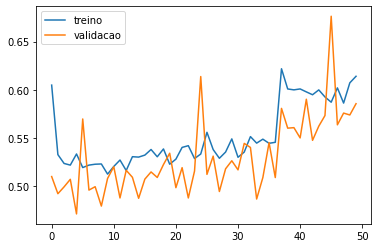

In [12]:
plt.plot(r.history['loss'], label='treino')
plt.plot(r.history['val_loss'], label='validacao')
plt.legend()
plt.show()

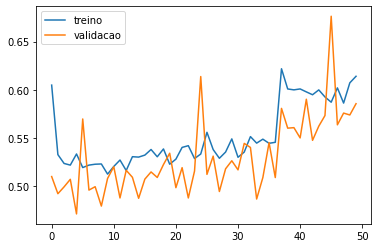

In [13]:
plt.plot(r.history['loss'], label='treino')
plt.plot(r.history['val_loss'], label='validacao')
plt.legend()
plt.show()

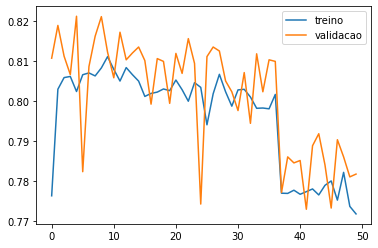

In [14]:
plt.plot(r.history['accuracy'], label='treino')
plt.plot(r.history['val_accuracy'], label='validacao')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def _plot_confusion_matrix(cm, classes,
                           normalize=False,
                           title='Confusion Matrix',
                           cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  else:
    print('sem normalização')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('Real')
  plt.xlabel('Previsto')
  plt.show()

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
_plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# vamos dar uma olhada nos casos que não estão sendo classificados corretamente
_classerr_idx = np.where(p_test == y_test)[0]
i = np.random.choice(_classerr_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f'Real: {y_test[i]}  Previsto: {p_test[i]}')
plt.show()